### Customer Churn Prediction

### Project Overview:
This project aims to develop a predictive model that can effectively identify customers who are likely to exit a multinational bank operating in France, Spain, and Germany. Customer churn, the act of customers leaving the bank, is a critical concern for financial institutions. Understanding and predicting churn can help the bank take proactive measures to retain valuable customers, thereby reducing revenue loss and maintaining a competitive edge in the market.

##### Data Description:
The dataset contains the following columns:

RowNumber: A unique identifier for each row.

CustomerId: A unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The country in which the customer resides (France, Spain, or Germany).

Gender: The gender of the customer (Male or Female).

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer uses.

HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).

IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).

EstimatedSalary: The estimated salary of the customer.

Exited: The target variable, indicating whether the customer has exited the bank (1 for yes, 0 for no).mm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing the dataset

df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# From above, it can be seen tat there are no missing value in the dataset

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Lets check if there is any duplicated row

df.duplicated().sum()

0

In [9]:
# from above, it can be seen that there are no duplicate rows

In [10]:
# lets check the distribution of the output column. i.e how many customers has exited the bank and how many are still continuing their services with the bank

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

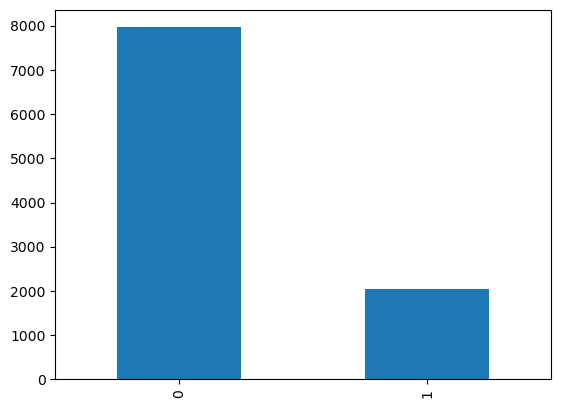

In [12]:
# lets plot it 
df['Exited'].value_counts().plot(kind='bar')

In [13]:
# From the above, it can be clearly seen that this dataset is highly imbalanced. So, lets balance it using SMOTE.
# I shall do it in later stage

In [14]:
# Lets check the distribution of Geography and Gender also

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

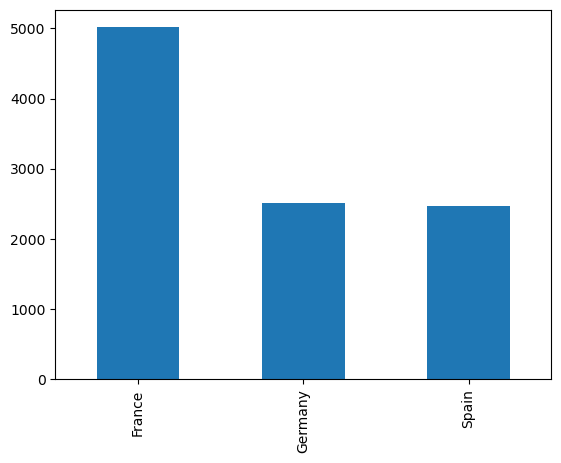

In [15]:
df['Geography'].value_counts().plot(kind='bar')

In [16]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

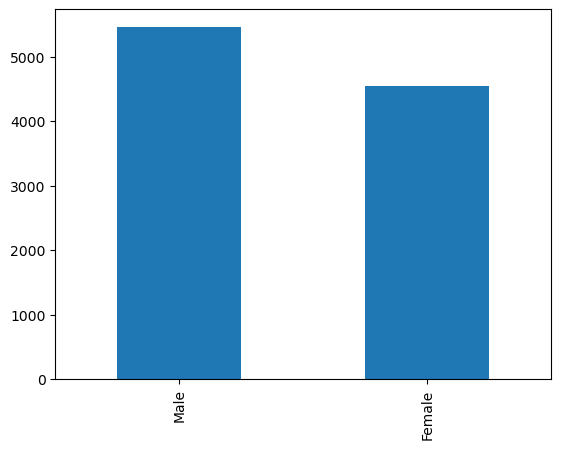

In [17]:
df['Gender'].value_counts().plot(kind='bar')

In [18]:
# Gender distribution is more or less equal

In [19]:
# now lets take only the required column 

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Lets convert the categorical column to numerical

df['Geography']=pd.factorize(df['Geography'])[0]

In [22]:
df['Gender']=pd.factorize(df['Gender'])[0]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [24]:
df.shape

(10000, 11)

In [25]:
X=df.iloc[:, 0:-1]
y=df.iloc[:, -1]

In [26]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
# Now lets balance the dataset using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote=SMOTE()

In [31]:
X_resampled,y_resampled=smote.fit_resample(X,y)

<AxesSubplot:>

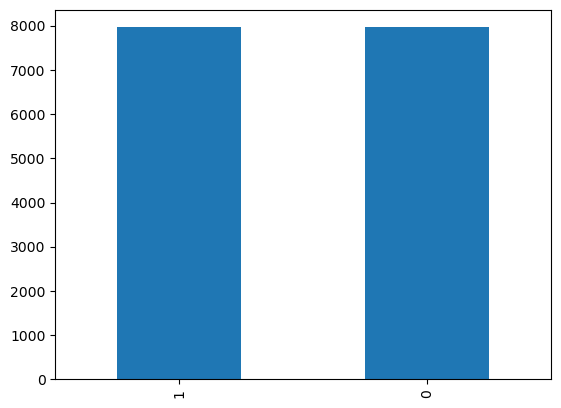

In [32]:
y_resampled.value_counts().plot(kind='bar')

In [33]:
# I have resamled and balanced the dataset.

In [34]:
# Lets split the data for training and building model using ANN

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)

In [37]:
print(X_resampled_train.shape, y_resampled_train.shape)
print(X_resampled_test.shape, y_resampled_test.shape)

(12740, 10) (12740,)
(3186, 10) (3186,)


In [38]:
# Since it is recommended to scale the values before building model using ANN (since if values are very far apart, the weights will not get converged easily)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
X_resampled_train_scaled=scaler.fit_transform(X_resampled_train)

In [42]:
X_resampled_test_scaled=scaler.fit_transform(X_resampled_test)

In [43]:
X_resampled_train_scaled

array([[ 0.40665966,  0.30421768,  1.17737617, ...,  0.77245797,
         1.28399714, -0.42748541],
       [-1.92443126,  1.51161123, -0.84934622, ...,  0.77245797,
         1.28399714, -0.48177231],
       [ 0.74592641,  0.30421768,  1.17737617, ..., -1.29456882,
        -0.77881794,  1.28467826],
       ...,
       [-0.46886744, -0.90317587, -0.84934622, ...,  0.77245797,
        -0.77881794, -0.47377704],
       [ 1.2493545 ,  1.51161123,  1.17737617, ...,  0.77245797,
        -0.77881794, -1.1667494 ],
       [-0.69869331,  0.30421768, -0.84934622, ...,  0.77245797,
        -0.77881794,  0.75087555]])

In [44]:
# !pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import tensorflow

In [46]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model=Sequential()

model.add(Dense(12,input_dim=10,activation='relu'))      # 1st Hidden layer    
model.add(Dense(10,activation='relu'))                    # 2nd Hidden layer
model.add(Dense(1, activation='sigmoid'))                  # Output layer

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# From above it can be seen that there are total 53 parameters which consist of weights and biases.
# So, when the Neural network model is trained, it will find the values of all 53 parameters for further prediction.

In [55]:
# Now lets compile the model

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [56]:
history=model.fit(X_resampled_train_scaled,y_resampled_train,epochs=150, validation_split=0.2)    # This is the stage where my neural network is getting trained

Epoch 1/150
319/319 [==============================] - 2s 3ms/step - loss: 0.5845 - accuracy: 0.7005 - val_loss: 0.5053 - val_accuracy: 0.7473
Epoch 2/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.7756 - val_loss: 0.4659 - val_accuracy: 0.7779
Epoch 3/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.7918 - val_loss: 0.4451 - val_accuracy: 0.7900
Epoch 4/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8018 - val_loss: 0.4271 - val_accuracy: 0.7998
Epoch 5/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8060 - val_loss: 0.4184 - val_accuracy: 0.7979
Epoch 6/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8097 - val_loss: 0.4133 - val_accuracy: 0.8014
Epoch 7/150
319/319 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8112 - val_loss: 0.4096 - val_accuracy: 0.8053

Epoch 58/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8297 - val_loss: 0.3950 - val_accuracy: 0.8234
Epoch 59/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.8295 - val_loss: 0.3932 - val_accuracy: 0.8254
Epoch 60/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8309 - val_loss: 0.3920 - val_accuracy: 0.8285
Epoch 61/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8307 - val_loss: 0.3922 - val_accuracy: 0.8293
Epoch 62/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8300 - val_loss: 0.3915 - val_accuracy: 0.8277
Epoch 63/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8287 - val_loss: 0.3922 - val_accuracy: 0.8250
Epoch 64/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8300 - val_loss: 0.3929 - val_accuracy:

Epoch 115/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8373 - val_loss: 0.3897 - val_accuracy: 0.8305
Epoch 116/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8380 - val_loss: 0.3889 - val_accuracy: 0.8316
Epoch 117/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8359 - val_loss: 0.3894 - val_accuracy: 0.8305
Epoch 118/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8386 - val_loss: 0.3911 - val_accuracy: 0.8293
Epoch 119/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8391 - val_loss: 0.3890 - val_accuracy: 0.8277
Epoch 120/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8387 - val_loss: 0.3879 - val_accuracy: 0.8281
Epoch 121/150
319/319 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8393 - val_loss: 0.3901 - val_ac

In [57]:
# Now the model has been trained and the model has calculated all the weights and biases.
# Lets check the weights assigned to the inputs

model.layers[0].get_weights()         # This will show all the 44 weights and 4 biases

[array([[ 1.15713544e-01, -8.12370237e-03,  7.05535829e-01,
         -1.73387691e-01, -2.07286656e-01, -5.21927238e-01,
          1.31162986e-01,  3.06810081e-01, -2.47093722e-01,
          4.05915082e-01,  1.97036266e-01,  2.21993238e-01],
        [ 8.65818143e-01,  5.79634190e-01,  9.55626816e-02,
         -5.34372449e-01, -5.97183645e-01, -8.65959004e-02,
          2.80351162e-01, -1.14683583e-01,  6.59072280e-01,
         -4.52150553e-01,  5.71406722e-01,  1.08764432e-01],
        [-1.65785313e-01, -4.13980372e-02,  8.61301497e-02,
         -1.59838215e-01,  5.31705797e-01, -2.51155615e-01,
          2.96937257e-01, -3.37815195e-01,  2.41873652e-01,
         -9.12962928e-02, -1.06222004e-01,  2.07560837e-01],
        [ 9.70145315e-02,  4.18629125e-02, -4.19463515e-01,
          7.96287596e-01, -3.00518721e-01,  9.37505245e-01,
          8.81838560e-01, -1.06165457e+00, -2.95067638e-01,
         -7.73485184e-01,  2.70921528e-01,  1.03409851e+00],
        [ 6.42190054e-02, -1.7398236

In [58]:
# Similarly lets check the weights for next layer

model.layers[1].get_weights()

[array([[-0.28517577,  0.33891177, -0.17430222, -0.8377728 ,  0.03467183,
         -0.04223611, -0.23082954,  0.8040995 ,  0.28407222, -0.17378233],
        [-0.15564589, -0.6904571 , -0.9460609 ,  0.4050482 ,  0.882264  ,
          0.09811027, -1.3906124 ,  0.32884368, -0.00332195, -0.44588697],
        [ 0.72398686,  0.32733297,  0.8307568 , -0.28768933,  0.21222338,
         -0.27723062,  0.312058  , -0.6640985 ,  0.38762864,  0.3345008 ],
        [ 0.7023816 ,  0.31196085, -0.5015186 ,  0.3748851 ,  0.22420007,
          0.2416443 , -0.27292398,  0.7005207 , -0.3497935 , -0.68202007],
        [ 0.1978392 ,  0.19917804, -0.5863452 , -0.22089082, -0.36832085,
         -0.13497029, -0.33476338,  0.04884693,  0.8758747 ,  0.09217855],
        [ 0.26790074,  0.8213269 ,  0.81144196,  0.14527683,  0.11219705,
          0.05361156, -0.0306341 , -0.22994858, -0.50730723,  0.16677657],
        [-0.33063138,  0.1721084 , -0.33872142, -0.462774  ,  0.79101205,
         -1.4893878 , -0.5475399

In [59]:
y_log=model.predict(X_resampled_test_scaled)
y_log

100/100 [==============================] - 0s 1ms/step


array([[0.08127175],
       [0.5154519 ],
       [0.97464645],
       ...,
       [0.78433067],
       [0.20655423],
       [0.12254305]], dtype=float32)

In [60]:
# Since the output is not in the form of 0 & 1. so lets convert it using a threshold of 0.5

In [61]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
print("Accuracy of the model is : ", accuracy_score(y_resampled_test,y_pred))

Accuracy of the model is :  0.8301946013810421


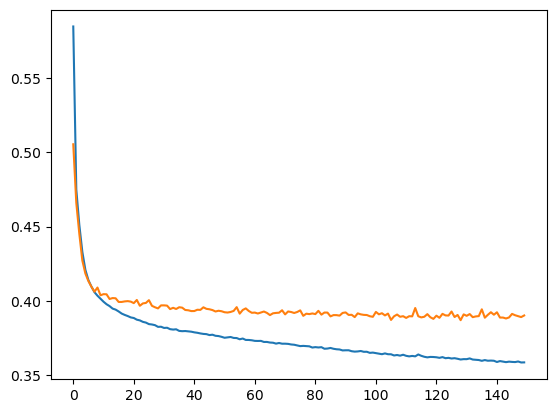

In [64]:
plt.plot(history.history['loss'])    # History is a dictionary that stores loss, accuracy, val+loss, val_accuracy in key value pair
plt.plot(history.history['val_loss'])

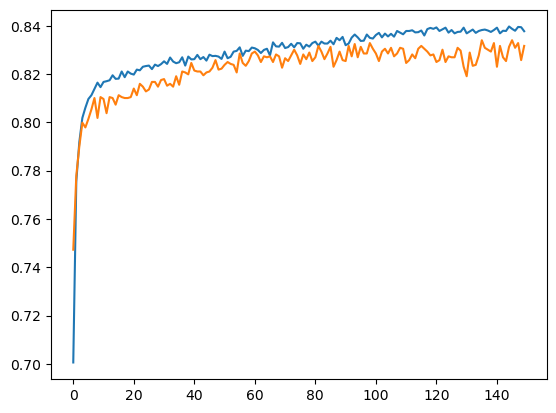

In [65]:
plt.plot(history.history['accuracy'])    
plt.plot(history.history['val_accuracy'])

In [66]:
#Since the loss and accuracy curves are more or less close to val_loss and val_accuray curve, so it can be inferrred that the model has not overfitted the training data

In [67]:
# Predicting on new data
X                       

# Geography: 0-France, 1-Spain, 2-Germany
# Gender: 0-Female, 1-Male

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [70]:
input_data=(650,1,0,50,2,55000,1,1,0,100000)

# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

1/1 [==============================] - 0s 72ms/step
[[1.]]


In [73]:
input_data=(500,1,1,30,2,500,1,1,0,50000)

# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.]]
